# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 32

**Author 1 (sciper):** Alexia Dormann (301997)  
**Author 2 (sciper):** XXXX (XXXXXX)   
**Author 3 (sciper):** XXXX (XXXXXX)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [3]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

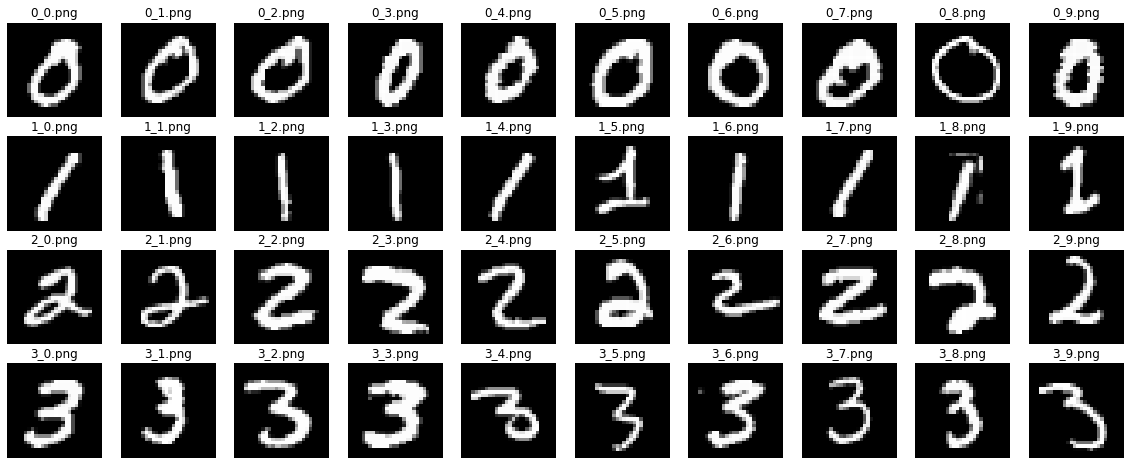

In [4]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

*1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)

In [5]:
import cv2
from skimage.morphology import binary_opening, binary_closing, disk, square

# Binarize image
binary_0 = []
for im in zeros_im:
    _, binary = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
    binary_0.append(binary)
binary_1 = []
for im in ones_im:
    _, binary = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
    binary_1.append(binary)
    
#Apply morphology to clean
B = disk(1)
zeros = []
for im in binary_0:
    binary = binary_closing(im, B).astype('uint8')*255
    zeros.append(binary)
    
ones = []
B = square(3)
for im in binary_1:
    binary = binary_closing(im, B).astype('uint8')*255
    ones.append(binary)
    

Let's visualize the preprocessing of our image:

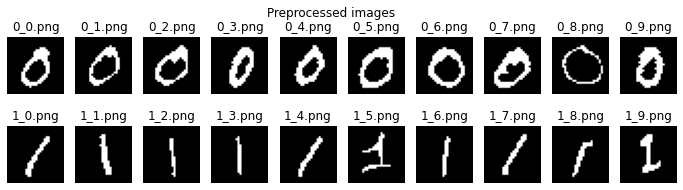

In [6]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

TO DO

### 1.2. Get descriptors (4 pts)

*2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)

In [7]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import scipy

# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.
def interpolation_contour(contours, N):
    
    #Interpolate contour to have N equidistant points
    contours = np.array(contours).squeeze()
    
    x,y = contours[:,0], contours[:,1]
    xd, yd = np.diff(x), np.diff(y)
    u = np.cumsum(np.sqrt(xd**2+yd**2))
    u = np.hstack([[0],u])

    t = np.linspace(0,u.max(),N)
    xn = np.interp(t, u, x)[:-1]
    yn = np.interp(t, u, y)[:-1]
    
    return np.array([xn,yn])

def get_descriptors(img, N):
    #Get contour, only keep outermost contour
    contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = interpolation_contour(contours, N) 
    
    #Compute 2D fourier transform
    descriptors = scipy.fft.fft2(contours)
    
    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(zeros[0], 25)[:10])

[[ 6.92956599e+02 -0.j         -7.21683588e+01+75.68252029j
  -4.20044237e+00 -8.06548544j -6.26914231e+00 +1.94143368j
  -1.77609879e+00 +5.66763171j -3.50178653e+00 +3.00828855j
  -2.30820707e+00 +3.4433171j  -1.11656934e+00 +1.20131393j
  -1.01230911e+00 -1.17778049j -7.54546960e-01 -1.08512958j
  -1.04465142e+00 -1.1125178j  -1.89596090e-01 -0.64367007j
  -2.73181216e-01 -0.j         -1.89596090e-01 +0.64367007j
  -1.04465142e+00 +1.1125178j  -7.54546960e-01 +1.08512958j
  -1.01230911e+00 +1.17778049j -1.11656934e+00 -1.20131393j
  -2.30820707e+00 -3.4433171j  -3.50178653e+00 -3.00828855j
  -1.77609879e+00 -5.66763171j -6.26914231e+00 -1.94143368j
  -4.20044237e+00 +8.06548544j -7.21683588e+01-75.68252029j]
 [-1.84321910e+01 -0.j          1.31983159e+02+67.5115136j
   3.09032142e+00 -5.0222448j   5.74841420e+00 +6.80416816j
   3.50695648e+00 +3.39475501j -6.66675334e-01 +3.24527672j
  -7.46951673e-01 +3.42626864j -5.16584553e-01 +0.41774709j
  -1.34824435e+00 -0.10011987j  4.607248

#### Discussion

To make the fourier descriptors comparable, we need the contours to be interpolated by a constant number of points. As the signals should have the same number of time steps or the descriptors are not comparable.

### 1.3. Study effect of descriptors (6 pts)

*3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)

In [8]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[1]
one = ones_im[1]

In [9]:
#Get the descriptors for both image
zero_descriptors = get_descriptors(zero, 100)
one_descriptors = get_descriptors(one, 100)

zero_reconst, one_reconst = [],[]
for s in descr_set_sizes:
    #Do it for the zero image
    zero_coeff = np.zeros_like(zero_descriptors)
    zero_coeff[:,:s] = zero_descriptors[:,:s] #positive freq
    zero_coeff[:,:-(s-1)] = zero_descriptors[:,:-(s-1)] #negative freq
    
    #Inverse fourier transform of the selected coeff
    reconst_idx = scipy.fft.ifft2(zero_coeff).real.transpose()
    reconst_idx = np.unique([[round(x[0]), round(x[1])] for x in reconst_idx], axis=0)

    reconst = np.zeros_like(zero)
    reconst[reconst_idx[:,0], reconst_idx[:,1]] = 1
    zero_reconst.append(reconst)
    
    #Do it for the one image
    one_coeff = np.zeros_like(one_descriptors)
    one_coeff[:,:s] = one_descriptors[:,:s] #positive freq
    one_coeff[:,:-(s-1)] = one_descriptors[:,:-(s-1)] #negative freq
    
    
    #Inverse fourier transform of the selected coeff
    reconst_idx = scipy.fft.ifft2(one_coeff).real.transpose()
    reconst_idx = np.unique([[round(x[0]), round(x[1])] for x in reconst_idx], axis=0)

    reconst = np.zeros_like(one)
    reconst[reconst_idx[:,0], reconst_idx[:,1]] = 1
    one_reconst.append(reconst)
    
    

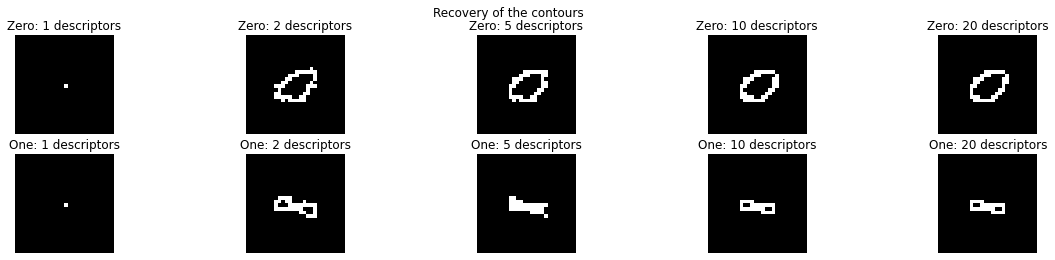

In [10]:
# On each of the 5 plots you will show the recovery for a "0" and a "1" (used the same axis for both a "0" and a "1").

fig, axes = plt.subplots(2, 5, figsize=(20, 4))
for i in range(0,  5):
    axes[0,i].imshow(zero_reconst[i], cmap='gray')
    axes[0,i].axis('off')
    axes[0,i].set_title(f'Zero: {descr_set_sizes[i]} descriptors')
    
for i in range(0,  5):
    axes[1,i].imshow(one_reconst[i], cmap='gray')
    axes[1,i].axis('off')
    axes[1,i].set_title(f'One: {descr_set_sizes[i]} descriptors')
    
fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

TODO

### 1.4 Clustering (2 pts)

*4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)

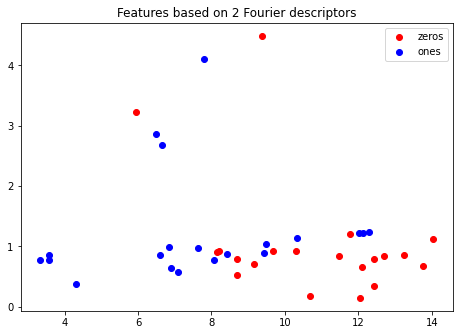

In [11]:
# TODO: You should fill the lists below, with your features

#Get descriptors and keep amplitudes 
zeros_des = [get_descriptors(im, 101) for im in zeros]
zeros_des = [2 / 100 * np.abs(des) for des in zeros_des]

ones_des = [get_descriptors(im, 101) for im in ones]
ones_des = [2 / 100 * np.abs(des) for des in ones_des]

# First feature for all "0"s
zeros_f1 = [des[:,1] for des in zeros_des]
# Second feature for all "0"s
zeros_f2 = [des[:,3] for des in zeros_des]
# Fist feature for all "1"s
ones_f1 = [des[:,1] for des in ones_des]
# Second feature for all "1"s
ones_f2 = [des[:,3] for des in ones_des]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

*5)* *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

#### Preliminary discussion

- Translation only affects the first compent as it encode the mean of the object. We simply discard the first fourier coefficient.
- Rotation only affects the phase of all descriptors. We will discard all phase of the descriptors.
- Scale does not affect the ratio between descriptors. One descriptor is chosen as the reference and each descriptor is devided by this reference descriptor.



#### Implementation

In [12]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    descriptors = get_descriptors(img, N=101)
    
    #Translation: discard first component
    if inv_to_translation:
        descriptors = descriptors[:, 1:]
        
    #Rotation: only keep amplitudes
    if inv_to_rotation:
        descriptors = 2 / 100 * np.abs(descriptors)
    
    #Scale: chose the f5 as reference and derive all by reference
    if inv_to_scale:
        reference = descriptors[:,5]
        descriptors = descriptors/reference
        
    return descriptors
    

In [13]:
from skimage.transform import rotate, rescale, AffineTransform, warp

# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    angle = np.random.randint(360)
    rotated = rotate(img, angle)
    
    return rotated

# Define custom translation function. You may add other parameters to the function.
def random_translate(img):
    x_translation, y_translation = np.random.randint(5, size=2)
    
    transform = AffineTransform(translation=[x_translation,y_translation])
    shifted = warp(img, transform, mode='wrap', preserve_range=False)
    shifted = shifted.astype(img.dtype)
    
    return shifted
    
# Define custom scaling function. You may add other parameters to the function.
def random_scale(img):
    scaling_factor = np.random.randint(1,100)
    rescaled = rescale(img, scaling_factor)
    
    return rescaled

In [17]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros =  [random_rotate(img) for img in zeros]
rotated_images_ones = [random_rotate(img) for img in ones]

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = [random_translate(img) for img in zeros]
translated_images_ones = [random_translate(img) for img in ones]

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = [random_scale(img) for img in zeros]
scaled_images_ones = [random_scale(img) for img in ones]

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = [random_scale(random_translate(random_rotate(img))) for img in zeros]
transformed_images_ones = [random_scale(random_translate(random_rotate(img))) for img in ones]

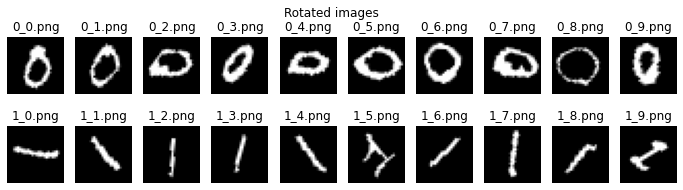

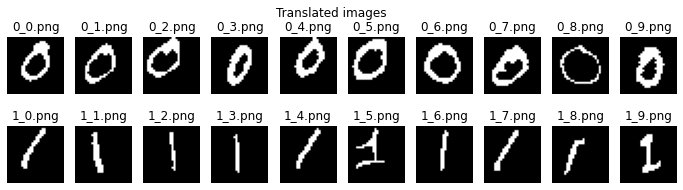

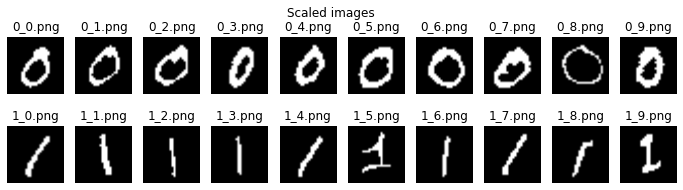

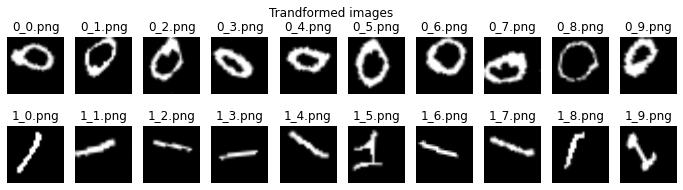

In [18]:
# Plot rotated images
fig, axes = plt.subplots(2, len(rotated_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], rotated_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], rotated_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Rotated images")
plt.show()

# Plot translated images
fig, axes = plt.subplots(2, len(translated_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], translated_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], translated_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Translated images")
plt.show()

# Plot scaled images
fig, axes = plt.subplots(2, len(scaled_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], scaled_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], scaled_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Scaled images")
plt.show()

# Plot transformed images
fig, axes = plt.subplots(2, len(transformed_images_zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], transformed_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], transformed_images_ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Trandformed images")
plt.show()

In [19]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


# TODO

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.1. Cluster on compacity (6 pts)

*1)* *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

In [54]:
# Binarize image
twos = []
for im in twos_im:
    _, binary = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
    twos.append((binary==255).astype(int))
    
threes = []
for im in threes_im:
    _, binary = cv2.threshold(im, 200, 255, cv2.THRESH_BINARY)
    threes.append((binary==255).astype(int))

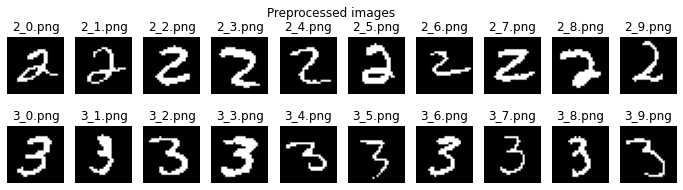

In [55]:
# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [56]:
from skimage.measure import perimeter

#Compute perimeters of 2/3 images
perimeters_2, perimeters_3 = [], []
for im in twos:
    perimeters_2.append(perimeter(im))
for im in threes:
    perimeters_3.append(perimeter(im))
    
print('Average perimeter (2/3):', np.mean(perimeters_2), np.mean(perimeters_3))

#Compute area of 2/3 images, get number non zero image of binary image
area_2, area_3 = [], []
for im in twos:
    area_2.append(np.sum(im))
    
for im in threes:
    area_3.append(np.sum(im))
    
print('Average area (2/3):', np.mean(area_2), np.mean(area_3))

Average perimeter (2/3): 76.81736649163068 67.52975105768083
Average area (2/3): 105.2 89.9


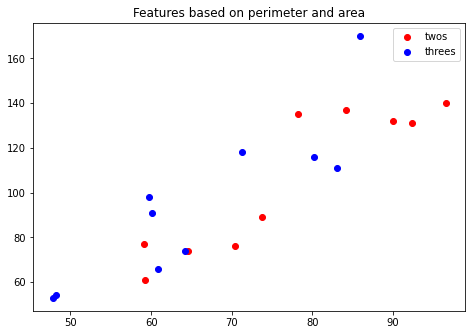

In [51]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = perimeters_2
twos_f2 = area_2
threes_f1 = perimeters_3
threes_f2 = area_3

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

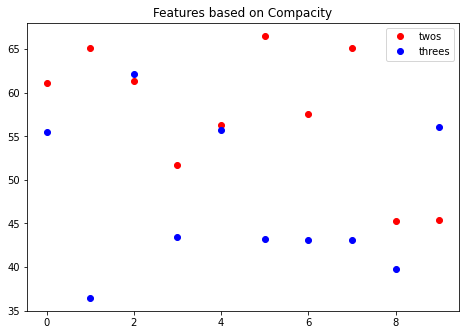

In [53]:
# TODO: Make the 1D plot of the compacity

#Compute compacity
compacity_2 = (np.array(perimeters_2)*np.array(perimeters_2))/np.array(area_2)
compacity_3 = (np.array(perimeters_3)*np.array(perimeters_3))/np.array(area_3)

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(compacity_2, 'bo', color='r', label='twos')
ax.plot(compacity_3, 'bo', color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on Compacity")
plt.show()


####  Discussion

Compacity is invariant to translation, rotation, scaling.

### 2.2. Additional method (4 pts)

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

We will use the eigenvalues of the inertia axes as the features to cluster the images. The eigenvalues are a measure of the variance of the
shape projected on the axes of inertia.

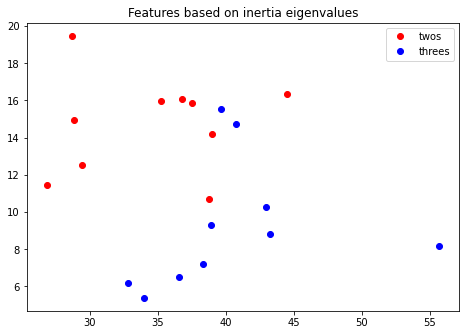

In [74]:
from skimage.measure import inertia_tensor_eigvals

inertia_eig_2 = [inertia_tensor_eigvals(img) for img in twos]
inertia_eig_3 = [inertia_tensor_eigvals(img) for img in threes]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.array(inertia_eig_2)[:,0], np.array(inertia_eig_2)[:,1], 'bo', color='r', label='twos')
ax.plot(np.array(inertia_eig_3)[:,0], np.array(inertia_eig_3)[:,1], 'bo', color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on inertia eigenvalues")
plt.show()

#### Discussion

TODO